# ADU Histogram Plotter
This notebook will be usefull for setting the ADU cutoff, especially when we are running gasses like Xe and Kr. Fluoresence may obscure any nonlinear effects as seen in LV04, so making sure we get this right at the beginning will be helpful. Modified from Ian.
## First loading in modules

In [3]:
import numpy as np 
import h5py
import matplotlib.pyplot as plt
import scipy.io
import os
import re
from utils import *
import psana

## Using the psana library to make a datasource for the specific run

In [4]:
##########################
runNumber=248
experiment='cxil1037623'
##########################
dsname = 'exp=%s:run=%d:smd' % (experiment , runNumber) 
ds = psana.DataSource(dsname)
events = ds.events()

exp=cxil1035023:run=248:smd


## Setting up the J4M detector and pulling off images

In [5]:
###############
n_images = 10 # Amount of images we want to pull from the run, 
###############
images = np.zeros((8,512,1024,n_images)) # Preallocation of the image array
jf = psana.Detector('jungfrau4M') # Grabbing the detector
n_filled = 0 # init
for i, evt in enumerate(ds.events()): # Loop for grabbing events
    if n_filled==n_images: # Breaking out of the loop if we reach n_images
        break
    if i%10==0: # Status updates every 10 images
        print(i)
    images[:,:,:,n_filled] = jf.calib(evt) # Grabbing the image and adding it to the array
    n_filled += 1 # Tick up after loop
print(images.shape)
hists,bins = np.histogram(images.flatten(),bins=np.linspace(0,100,200)) # Binning the flattened J4M images into the histogram variables

0
(8, 512, 1024, 10)


## Plotting it

Text(0.5, 1.0, 'Run 248')

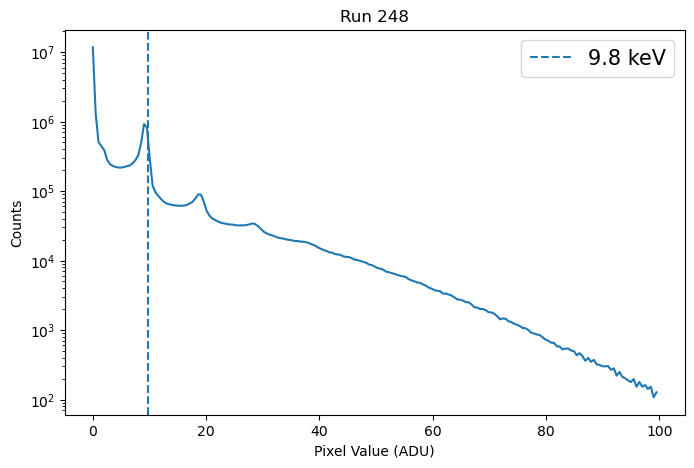

In [7]:
plt.figure(figsize=(8,5))
plt.semilogy(bins[:-1],hists)
plt.xlabel('Pixel Value (ADU)')
plt.ylabel('Counts')
# plt.axvline(9.8,linestyle='--',label='9.8 keV') # You can add vertical lines here with this line
plt.legend(fontsize=15)
plt.title(f'Run {runNumber}')